## DS 862 Machine Learning for Business Analysts Fall 2020

### Naive Bayes

#### Submitted by:
* Di Wang

For this assignment, you will use the German Credit Card data set from UCI data repository [(here)](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29).
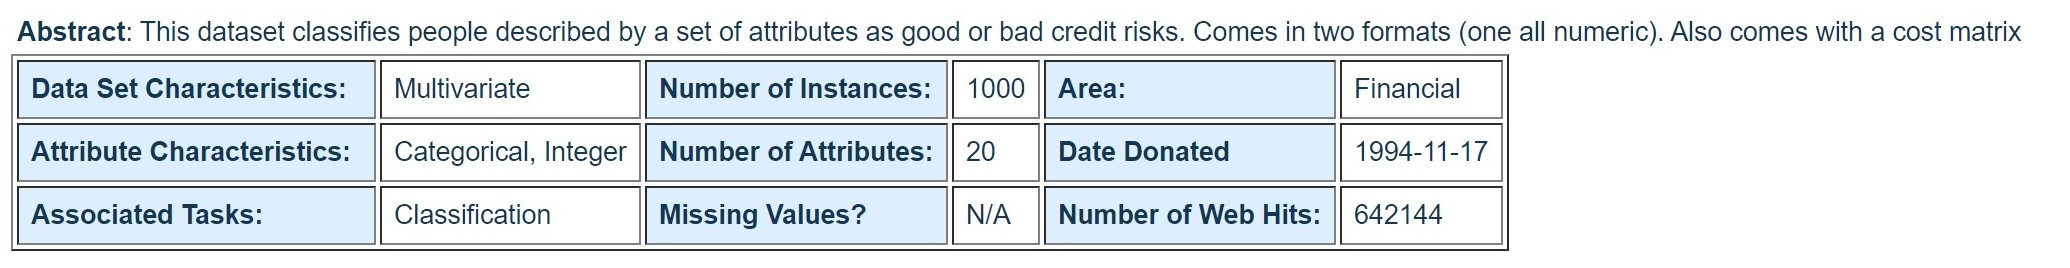

- Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
Attribute 2: (numerical)
Duration in month
Attribute 3: (qualitative)
Credit history
Attribute 4: (qualitative)
Purpose
Attribute 5: (numerical)
Credit amount
Attibute 6: (qualitative)
Savings account/bonds
Attribute 7: (qualitative)
Present employment since
Attribute 8: (numerical)
Installment rate in percentage of disposable income
Attribute 9: (qualitative)
Personal status and sex
Attribute 10: (qualitative)
Other debtors / guarantors
Attribute 11: (numerical)
Present residence since
Attribute 12: (qualitative)
Property
Attribute 13: (numerical)
Age in years
Attribute 14: (qualitative)
Other installment plans
Attribute 15: (qualitative)
Housing
Attribute 16: (numerical)
Number of existing credits at this bank
Attribute 17: (qualitative)
Job
Attribute 18: (numerical)
Number of people being liable to provide maintenance for
Attribute 19: (qualitative)
Telephone
Attribute 20: (qualitative)
foreign worker

In [1]:
# pip install mixed-naive-bayes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from mixed_naive_bayes import MixedNB

import warnings  
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('gcredit.csv')

In [4]:
data.head()
# There is no 0 or any missing value in this dataset.

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


This dataset doesn't have column names, so we won't really look into interpretation here. You can learn about what each attribute is from the link above. 

Here is roughly what you need to do for this assignment (not in particular order).

1. Separate the feature set into numerical and categorical.
2. Use LabelEncoder to convert each of the categorical feature to numbers. You may want to do it for the response as well.
3. Fit a Naive Bayes model using each of the feature type (i.e. numerical and categorical). For the categorical feature, use CategoricalNB.
4. Use the mixed NB library to fit the NB on the entire data set.

For course, use a test set to evaluate the performance. For the categorical features, also tune your alpha value. 

#### Separate the data into features and response, then further separate the features as instructed above.

In [5]:
# Separate data into features and response
X = data.copy()
X = X.drop('V21', axis = 1)
y = data['V21']

# Separate features into numerical and categorical
# Since V16 and V18 are discrete counts of data, I put them in categorical
X_num = X[['V2','V5','V8','V11','V13']]

# Use LabelEncoder to convert each of the categorical feature to numbers
X['V1'] = LabelEncoder().fit_transform(X['V1'])
X['V3'] = LabelEncoder().fit_transform(X['V3'])
X['V4'] = LabelEncoder().fit_transform(X['V4'])
X['V6'] = LabelEncoder().fit_transform(X['V6'])
X['V7'] = LabelEncoder().fit_transform(X['V7'])
X['V9'] = LabelEncoder().fit_transform(X['V9'])
X['V10'] = LabelEncoder().fit_transform(X['V10'])
X['V12'] = LabelEncoder().fit_transform(X['V12'])
X['V14'] = LabelEncoder().fit_transform(X['V14'])
X['V15'] = LabelEncoder().fit_transform(X['V15'])
X['V16'] = LabelEncoder().fit_transform(X['V16'])
X['V17'] = LabelEncoder().fit_transform(X['V17'])
X['V18'] = LabelEncoder().fit_transform(X['V18'])
X['V19'] = LabelEncoder().fit_transform(X['V19'])
X['V20'] = LabelEncoder().fit_transform(X['V20'])

X_cat = X.drop(['V2','V5','V8','V11','V13'],axis=1)

# Do LabelEncoder for the response as well
y = LabelEncoder().fit_transform(y)

#### Naive Bayes for continuous features

In [6]:
# Gaussian Naive Bayes - when the features are numerical/continuous   
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size = 0.2, random_state = 123)
GB = GaussianNB()
GB.fit(X_train, y_train)
print(GB.predict(X_test))
print("Accuracy:", np.mean(GB.predict(X_test) == y_test))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
Accuracy: 0.695


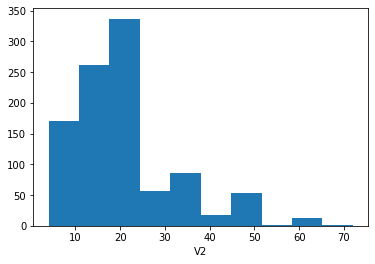

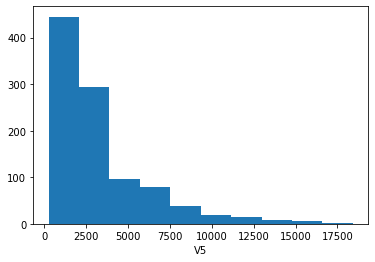

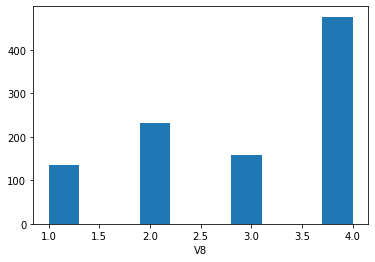

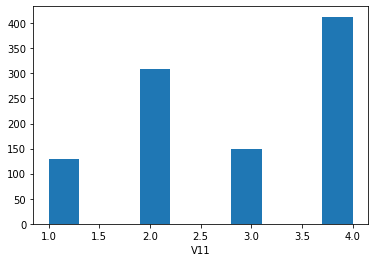

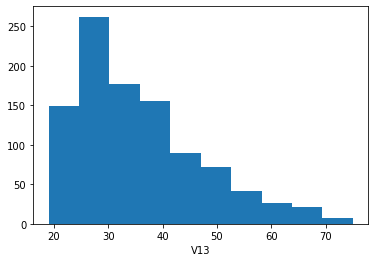

In [7]:
# check if they are normal distribution
for i in X_num:
    plt.figure(i)
    plt.hist(X_num[i])
    plt.xlabel(i)

Since the features (V2, V5, V13) are not normally distributed, we need to transform them. 

In [8]:
X_num['V2'] = np.log(1 + X_num['V2'])
X_num['V5'] = np.log(1 + X_num['V5'])
X_num['V13'] = np.log(1 + X_num['V13'])

In [9]:
# check with Gaussian NB
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size = 0.2, random_state = 123)
GB = GaussianNB()
GB.fit(X_train, y_train)
print(GB.predict(X_test))
print("Accuracy:", np.mean(GB.predict(X_test) == y_test))

[1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
Accuracy: 0.69


<b>Your observation: </b>
- After transfroming the data, we didn't see any improvement on Gaussian NB, so we will use the original data. 
- With the original data, we will get the accuracy rate of 69.5%.

#### Naive Bayes for categorical features

In [10]:
# Categorical Naive Bayes 
X_train, X_test, y_train, y_test = train_test_split(X_cat, y, test_size = 0.2, random_state =123)
pipeline = Pipeline([('CB', CategoricalNB())])
parameters = [{'CB__alpha': np.arange(0, 1.5, 0.05)}]
CBmodel = GridSearchCV(pipeline, parameters, n_jobs = -1, cv = 5)
CBmodel.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('CB', CategoricalNB())]),
             n_jobs=-1,
             param_grid=[{'CB__alpha': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45])}])

In [11]:
print("Best Parameter:", CBmodel.best_params_)
print("Highest Accuracy:", np.mean(CBmodel.predict(X_test) == y_test))

Best Parameter: {'CB__alpha': 0.35000000000000003}
Highest Accuracy: 0.755


<b>Your observation: </b>
- The best parameter for this CategoricalNB model is alpha = 0.35, with an accuracy rate of 75.5%.

#### Fit the mixed Naive Bayes

[ 4  5 10  5  5  4  3  4  3  3  4  4  2  2  2]
[ 4  5 10  5  5  4  3  4  3  3  4  4  2  2  2]
[ 4  5 10  5  5  4  3  4  3  3  4  4  2  2  2]
[ 4  5 10  5  5  4  3  4  3  3  4  4  2  2  2]
[ 4  5 10  5  5  4  3  4  3  3  4  4  2  2  2]
[ 4  5 10  5  5  4  3  4  3  3  4  4  2  2  2]


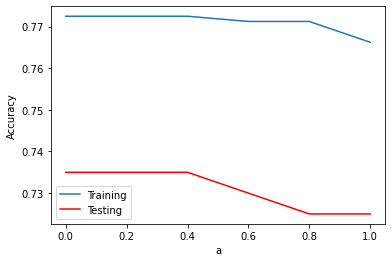

Highest Accuracy: 0.735


In [12]:
# Use the mixed NB library to fit the NB on the entire data set
# https://remykarem.github.io/docs/mixed_naive_bayes.html

train_accuracy = []
test_accuracy = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

for a in [0,0.2,0.4,0.6,0.8,1]:
    MBmodel = MixedNB(categorical_features = [0,2,3,5,6,8,9,11,13,14,15,16,17,18,19], alpha = a)
    MBmodel.fit(X_train, y_train)

    y_hat = MBmodel.predict(X_train)
    train_accuracy.append(sum(y_hat == y_train)/len(y_train))
    y_hat = MBmodel.predict(X_test)
    test_accuracy.append(sum(y_hat == y_test)/len(y_test))

plt.plot([0,0.2,0.4,0.6,0.8,1], train_accuracy, label = 'Training')
plt.plot([0,0.2,0.4,0.6,0.8,1], test_accuracy, color = 'red', label = 'Testing')
plt.xlabel("a")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print("Highest Accuracy:", max(test_accuracy))

<b>Your observation: </b>


| Dataset | GaussianNB | CategoricalNB | MixedNB (C+G)
| --- | --- | --- | --- |
| German Credit Card | .695 | .755 | .735 |

- MixedNB (C+G) - our API for Naive Bayes where some features follow categorical distribution, and some features follow Gaussian.
- When we tuning the alpha for MixedNB, looks like the accuracy is high when alpha equals 0, 0.2 and 0.4, but if we set a different random_state, the result will be quite different. Thus, the way of seperating the data will influence our results. 
- For this study, the accuracy rate of MixedNB 73.5% is higher than GaussianNB model with original data, but lower than  CategoricalNB. 

### Thank you.